In [6]:
from frame_classification_process import frame_process
from keras.utils import to_categorical
import numpy as np
import os
from models import models

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# load data info
curr_path = os.getcwd()
x_train_ind = np.load(curr_path+'/datasets/x_train_ind_above400.npy')
y_train = np.load(curr_path+'/datasets/y_train_mapped_above400.npy')

In [8]:
#### grab small part of training data ####
num_videos = 1000
num_videos = len(y_train) if num_videos > len(y_train) else num_videos

x_train_ind = x_train_ind[:num_videos]
y_train_ori = np.copy(y_train[:num_videos])
unique, counts = np.unique(y_train_ori, return_counts=True)
num_classes = len(unique)

fp = frame_process(num_videos, size = (64,64,3))
X_train = fp.process_frameSeq(x_train_ind)
y_train = to_categorical(y_train_ori, num_classes=num_classes)
# np.save("./datasets/X_train_10_64_64_3.npy", X_train)

100%|██████████| 1000/1000 [00:30<00:00, 32.98it/s]


In [7]:
#### load full training data ####
curr_path = os.getcwd()
X_train = np.load("./datasets/X_train_10_64_64_3.npy")
y_train = np.load(curr_path+'/datasets/y_train_mapped_above400.npy')
unique, counts = np.unique(y_train, return_counts=True)
num_classes = len(unique)
y_train_ori = np.copy(y_train)
y_train = to_categorical(y_train, num_classes=num_classes)

In [4]:
#### check data ####
print("X shape: ", X_train.shape, "y shape: ", y_train.shape)
print("frame size: ", X_train.shape[2:])
print("num_videos:", num_videos)
print("num_classes", num_classes)
y_count = dict(zip(unique, counts))
print(y_count)

X shape:  (1000, 10, 64, 64, 3) y shape:  (1000, 10)
frame size:  (64, 64, 3)
num_videos: 1000
num_classes 10
{0: 110, 1: 70, 2: 149, 3: 69, 4: 123, 5: 115, 6: 87, 7: 102, 8: 71, 9: 104}


In [22]:
### parameter tunning ###
lrs = []
regs = []
accs = []
val_accs = []
for i in range(100):
    lr = 10 ** np.random.uniform(-5,0)
    reg = 10 ** np.random.uniform(-4, 2)
    c3d = models(model_name = "c3d", size = (64,64,3), num_classes = num_classes, reg = reg)
    c3d.train(X_train, y_train, epochs=12, batch_size=32, validation_split = 0.2, verbose = 0,  lr = lr )
    print('lr:', lr,', reg:', reg,', train acc:', c3d.history.history['acc'][-1],', val acc:', c3d.history.history['val_acc'][-1])
    lrs.append(lr)
    regs.append(reg)
    accs.append(c3d.history.history['acc'][-1])
    val_accs.append(c3d.history.history['val_acc'][-1])

lr: 0.5080019387340812 , reg: 0.28523096692149325 , train acc: 0.34375 , val acc: 0.265
lr: 0.0020958685103820425 , reg: 0.0007715754456669993 , train acc: 0.325 , val acc: 0.255
lr: 0.16890158946493478 , reg: 10.68463453911436 , train acc: 0.3 , val acc: 0.245
lr: 0.2829996075147339 , reg: 0.00041307684320210673 , train acc: 0.33 , val acc: 0.215
lr: 0.00011118171847699893 , reg: 0.4819215481956486 , train acc: 0.32375 , val acc: 0.265
lr: 1.507672556560061e-05 , reg: 3.5161343106720255 , train acc: 0.34 , val acc: 0.23
lr: 0.10878567567492604 , reg: 0.006589489595721638 , train acc: 0.29 , val acc: 0.24
lr: 0.0003634512524388234 , reg: 0.03919247706849693 , train acc: 0.39875 , val acc: 0.215
lr: 0.00018448456120909718 , reg: 0.10400761531375634 , train acc: 0.2225 , val acc: 0.195
lr: 0.00034300769734704663 , reg: 0.000155455707087738 , train acc: 0.3125 , val acc: 0.225
lr: 4.885609906060259e-05 , reg: 0.00019496759760307233 , train acc: 0.27 , val acc: 0.27
lr: 0.00172404617431326

In [34]:
#### create model ####
from models import models
reg = 1e-1
lr = 1e-2
c3d = models(model_name = "c3d", size = (64,64,3), num_classes = num_classes, reg = reg )
# c3d.load(model_path, model_name, model_name)

In [35]:
#### training ####
c3d.train(X_train, y_train, epochs=50, batch_size=32, validation_split = 0.2, verbose = 1,  lr = lr)
# c3d.save(model_path , model_name, model_name)

Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 17s - loss: 59.2279 - acc: 0.1500 - val_loss: 59.3575 - val_acc: 0.0750
Epoch 2/50
800/800 [==============================] - 2s - loss: 48.2236 - acc: 0.1913 - val_loss: 48.9770 - val_acc: 0.0900
Epoch 3/50
800/800 [==============================] - 2s - loss: 44.1341 - acc: 0.2200 - val_loss: 43.5575 - val_acc: 0.1500
Epoch 4/50
800/800 [==============================] - 2s - loss: 41.6703 - acc: 0.2438 - val_loss: 40.8846 - val_acc: 0.1500
Epoch 5/50
800/800 [==============================] - 2s - loss: 39.8370 - acc: 0.2838 - val_loss: 39.2937 - val_acc: 0.1700
Epoch 6/50
800/800 [==============================] - 2s - loss: 38.4226 - acc: 0.2850 - val_loss: 38.0202 - val_acc: 0.1850
Epoch 7/50
800/800 [==============================] - 2s - loss: 37.2221 - acc: 0.3313 - val_loss: 36.9523 - val_acc: 0.1950
Epoch 8/50
800/800 [==============================] - 2s - loss: 36.2621 - acc

Test Accuracy: 0.536


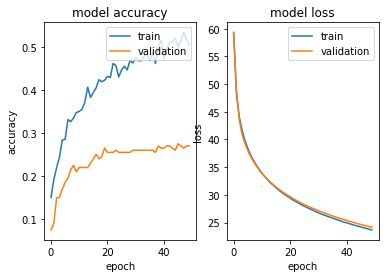

In [36]:
#### result ####
ypred = c3d.model.predict(X_train)
ypred_label = np.argmax(ypred, axis = 1)
print('Test Accuracy: {0}'.format(np.mean(ypred_label == y_train_ori)))
c3d.plot()

Test Accuracy: 0.502


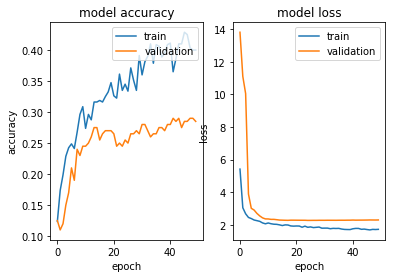

In [26]:
#### result ####
ypred = c3d.model.predict(X_train)
ypred_label = np.argmax(ypred, axis = 1)
print('Test Accuracy: {0}'.format(np.mean(ypred_label == y_train_ori)))
c3d.plot()


In [100]:
# random data for test
x_rand_0 = np.random.normal(0, 0.1, (5,10,64,64,3))
x_rand_1 = np.random.normal(0, 0.1, (5,10,64,64,3))
x_rand = np.vstack( (x_rand_0, x_rand_1))
X_train = x_rand
y_train_ori = np.array([0,0,0,0,0,1,1,1,1,1])
y_train = to_categorical(y_train_ori, num_classes=2)
print(X_train.shape, y_train_ori.shape, y_train.shape)


(10, 10, 64, 64, 3) (10,) (10, 2)


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


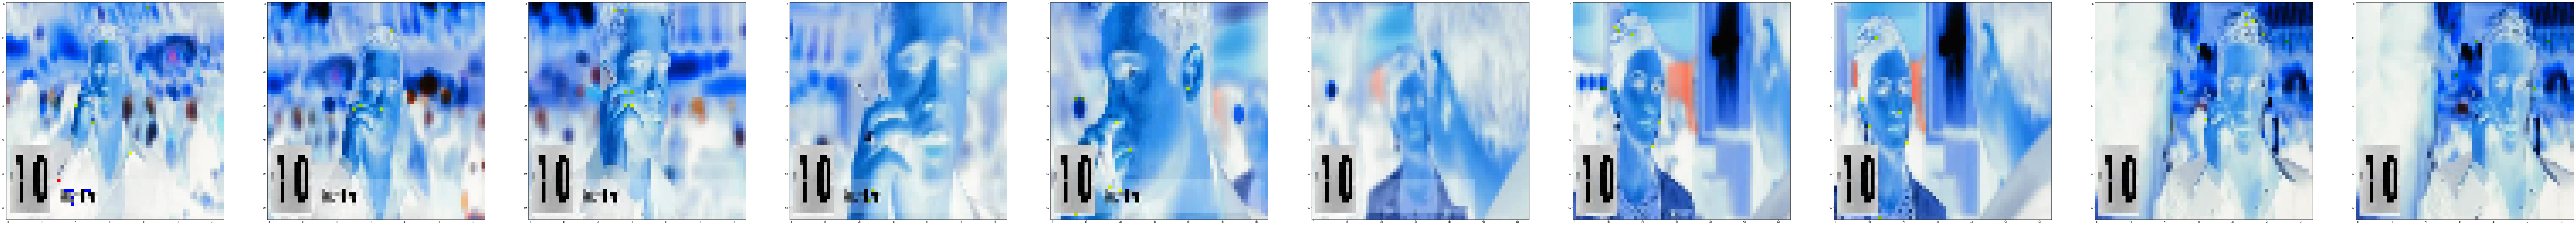

In [10]:
import matplotlib.pyplot as plt

video = X_train[10,:,:,:,:]
plt.figure(figsize=(200,60))
for t in range(video.shape[0]):
    frame_t = video[t]
    plt.subplot(1,10,t+1)
    plt.imshow(frame_t)
plt.show()

